In [ ]:
%pip install numpy matplotlib

In [76]:
import numpy as np
from matplotlib import pyplot as plt

In [81]:
def mandelbrot(x, y, dim: tuple[int, int], iter=512, r=2.0):
    (r_y, r_x) = dim
    org_r = np.float128(np.interp(x, [0, r_x - 1], [-r, r]))
    org_i = np.float128(np.interp(y, [0, r_y - 1], [-r, r]))

    z = complex(0, 0)
    for n in range(iter):
        z = z * z + complex(org_r, org_i)
        if abs(z) > r:
            return np.interp(np.sqrt(n / iter), [0, 1], [0, 256])

    return -1


In [82]:
def get_mandelbrot(dim: tuple[int, int], iter=512, r=2.0):
    matrix = np.matrix(np.zeros(dim))
    (r_y, r_x) = dim
    for y in range(r_y):
        for x in range(r_x):
            res = mandelbrot(x, y,dim, iter=2048)
            matrix[y, x] = res
            
    return matrix


In [91]:
# %%timeit
dim = 2024
mandelbrot_set = get_mandelbrot((dim, dim))

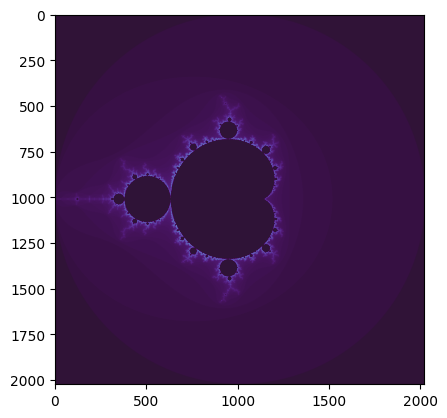

In [92]:
img = plt.imshow(mandelbrot_set, cmap='twilight_shifted')


In [93]:
plt.imsave('./mandelbrot.png', mandelbrot_set)